In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import base64
import requests
from bs4 import BeautifulSoup
import time
import re

In [4]:
charts_df = pd.read_csv('../data/charts.csv')
lyrics_df = pd.read_csv('../data/billboard_24years_lyrics_spotify.csv')
spotify_qualities_df = pd.read_csv('../data/Hot100.csv')
song_attributes_df = pd.read_csv('../data/songAttributes_1999-2019.csv')

In [5]:
#spotify_qualities_df.info()
updated_song_attributes_df = song_attributes_df.drop(['Unnamed: 0', 'Popularity', 'Album'], axis=1)
updated_song_attributes_df = updated_song_attributes_df.rename(columns={'Name': 'song', 'Artist': 'artist'})
updated_song_attributes_df['artist'] = updated_song_attributes_df['artist'].str.lower()
updated_song_attributes_df['song'] = updated_song_attributes_df['song'].str.lower()
updated_song_attributes_df.head(20)

,Acousticness,artist,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,song,Speechiness,Tempo,TimeSignature,Valence
0,0.000728,collective soul,0.520,234947,0.904,False,0.010300,0.0634,-5.030,1,welcome all again,0.0309,106.022,4,0.365
1,0.018200,collective soul,0.581,239573,0.709,False,0.000664,0.1740,-4.909,1,fuzzy,0.0282,120.027,4,0.408
2,0.000473,collective soul,0.572,198400,0.918,False,0.000431,0.0977,-3.324,0,dig,0.0559,144.061,4,0.370
3,0.000970,collective soul,0.596,231453,0.661,False,0.000033,0.1130,-5.051,1,you,0.0254,111.975,4,0.183
4,0.000036,collective soul,0.520,222520,0.808,False,0.000010,0.0800,-4.553,0,my days,0.0318,92.721,4,0.666
5,0.010600,collective soul,0.353,263880,0.754,False,0.000073,0.1200,-4.570,1,understanding,0.0452,138.003,4,0.546
6,0.043600,collective soul,0.629,214973,0.787,False,0.000047,0.1000,-5.657,1,staring down,0.0277,100.440,4,0.476
7,0.000402,collective soul,0.646,206067,0.853,False,0.000090,0.1170,-4.685,1,she does,0.0278,127.963,4,0.699
8,0.000521,collective soul,0.645,216400,0.840,False,0.000011,0.0370,-4.995,1,lighten up,0.0697,140.025,4,0.795
9,0.000380,collective soul,0.601,212013,0.861,False,0.000002,0.1310,-4.690,1,love,0.0319,120.017,4,0.615


In [17]:
updated_song_attributes_df = updated_song_attributes_df.drop_duplicates(subset=['artist', 'song'])
updated_song_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130191 entries, 0 to 154930
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      130191 non-null  float64
 1   artist            130191 non-null  object 
 2   Danceability      130191 non-null  float64
 3   Duration          130191 non-null  int64  
 4   Energy            130191 non-null  float64
 5   Explicit          130191 non-null  bool   
 6   Instrumentalness  130191 non-null  float64
 7   Liveness          130191 non-null  float64
 8   Loudness          130191 non-null  float64
 9   Mode              130191 non-null  int64  
 10  song              130191 non-null  object 
 11  Speechiness       130191 non-null  float64
 12  Tempo             130191 non-null  float64
 13  TimeSignature     130191 non-null  int64  
 14  Valence           130191 non-null  float64
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 15.0+ MB


In [18]:
updated_song_attributes_df['song_cleaned'] = updated_song_attributes_df['song'].str.replace(r'\s*\((feat\.?|featuring)[^)]*\)', '', regex=True).str.strip()
updated_song_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130191 entries, 0 to 154930
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Acousticness      130191 non-null  float64
 1   artist            130191 non-null  object 
 2   Danceability      130191 non-null  float64
 3   Duration          130191 non-null  int64  
 4   Energy            130191 non-null  float64
 5   Explicit          130191 non-null  bool   
 6   Instrumentalness  130191 non-null  float64
 7   Liveness          130191 non-null  float64
 8   Loudness          130191 non-null  float64
 9   Mode              130191 non-null  int64  
 10  song              130191 non-null  object 
 11  Speechiness       130191 non-null  float64
 12  Tempo             130191 non-null  float64
 13  TimeSignature     130191 non-null  int64  
 14  Valence           130191 non-null  float64
 15  song_cleaned      130191 non-null  object 
dtypes: bool(1), float64(9), i

In [7]:
updated_spotify_qualities_df = spotify_qualities_df.drop(['Popularity', 'Album'], axis=1)
updated_spotify_qualities_df = updated_spotify_qualities_df.rename(columns={'Artist': 'main_artist', 'Track': 'song', 'Year': 'year'})
updated_spotify_qualities_df['main_artist'] = updated_spotify_qualities_df['main_artist'].str.lower()
updated_spotify_qualities_df['song'] = updated_spotify_qualities_df['song'].str.lower()
updated_spotify_qualities_df.tail(20)

,song,main_artist,year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
600,perreo porky,yng lvcas,2023,224842,4,0.887,0.5980,6,-6.890,1,0.1000,0.0990,0.001790,0.1010,0.768,95.010
601,ven hdp,yng lvcas,2023,154666,4,0.831,0.8290,6,-5.887,1,0.0873,0.4500,0.001400,0.0915,0.865,96.969
602,chicken fried,zac brown band,2008,238146,4,0.566,0.7130,6,-4.250,1,0.0418,0.6450,0.000000,0.1140,0.805,169.861
603,colder weather,zac brown band,2010,273893,4,0.667,0.3810,3,-7.494,1,0.0294,0.4550,0.000000,0.1160,0.199,135.975
604,goodbye in her eyes,zac brown band,2012,324266,4,0.411,0.5580,3,-7.393,1,0.0380,0.1620,0.000004,0.0879,0.379,81.274
605,highway 20 ride,zac brown band,2008,229280,4,0.531,0.4030,3,-7.195,1,0.0338,0.5510,0.000014,0.1050,0.431,76.125
606,homegrown,zac brown band,2015,205000,4,0.712,0.8070,6,-3.976,1,0.0297,0.0244,0.000122,0.0905,0.936,105.024
607,jump right in,zac brown band,2013,180813,4,0.699,0.8190,1,-5.111,1,0.0580,0.0886,0.000000,0.1430,0.654,104.020
608,knee deep (feat. jimmy buffett),zac brown band,2010,203173,4,0.715,0.5840,8,-8.231,1,0.0296,0.4320,0.000001,0.0950,0.609,90.990
609,toes,zac brown band,2008,262773,4,0.801,0.7590,11,-5.398,1,0.0378,0.6570,0.000000,0.0897,0.821,129.971


In [8]:
charts_df['date'] = pd.to_datetime(charts_df['date'])
charts_df['year'] = charts_df['date'].dt.year
updated_charts_df = charts_df.drop(['date', 'last-week', 'rank'], axis=1)
updated_charts_df['artist'] = updated_charts_df['artist'].str.lower()
updated_charts_df['song'] = updated_charts_df['song'].str.lower()
updated_charts_df['year'].max()

2021

In [9]:
featured_artists= ['featuring', '&', 'with', 'x']
def extract_featured(artist):
    for featured in featured_artists:
          if featured in artist:
            parts = artist.split(featured)
            if len(parts) > 1:
                return parts[1].strip()
    return None

def extract_main_artist(artist):
    for featured in featured_artists:
        if featured in artist:
            parts = artist.split(featured)
            return parts[0].strip()
    return artist.strip()

updated_charts_df['featured_artist'] = updated_charts_df['artist'].apply(extract_featured)
updated_charts_df['main_artist'] = updated_charts_df['artist'].apply(extract_main_artist)
updated_charts_df.tail(20)

,song,artist,peak-rank,weeks-on-board,year,featured_artist,main_artist
330067,beautiful delilah,chuck berry,81,1,1958,None,chuck berry
330068,blip blop,bill doggett,82,1,1958,None,bill doggett
330069,try the impossible,lee andrews and the hearts,83,1,1958,None,lee andrews and the hearts
330070,summertime blues,eddie cochran,84,1,1958,None,eddie cochran
330071,got a match?,the daddy-o's,85,1,1958,None,the daddy-o's
330072,to be loved,jackie wilson,86,1,1958,None,jackie wilson
330073,jealousy,kitty wells,87,1,1958,None,kitty wells
330074,just like in the movies,the upbeats,88,1,1958,None,the upbeats
330075,blue boy,jim reeves,89,1,1958,None,jim reeves
330076,stay,the ames brothers,90,1,1958,None,the ames brothers


In [10]:
range_updated_charts_df = updated_charts_df[
    (updated_charts_df['year'] >= 1999) &
    (updated_charts_df['year'] <= 2018)]
range_updated_charts_df.tail(20)

,song,artist,peak-rank,weeks-on-board,year,featured_artist,main_artist
119280,angel in disguise,brandy,75,5,1999,None,brandy
119281,i don't want to miss a thing,aerosmith,1,18,1999,None,aerosmith
119282,father of mine,everclear,77,5,1999,None,everclear
119283,never there,cake,81,5,1999,None,cake
119284,it must be love,ty herndon,38,5,1999,None,ty herndon
119285,faded pictures,case & joe,86,2,1999,joe,case
119286,home alone,r. kelly featuring keith murray,65,5,1999,keith murray,r. kelly
119287,hooch,everything,69,5,1999,None,everything
119288,we really shouldn't be doing this,george strait,44,5,1999,None,george strait
119289,fire escape,fastball,86,5,1999,None,fastball


In [11]:
filtered_artist_df = range_updated_charts_df[range_updated_charts_df['main_artist'].isin(updated_song_attributes_df['artist'])]
filtered_artist_df.head(50)

,song,artist,peak-rank,weeks-on-board,year,featured_artist,main_artist
14905,high hopes,panic! at the disco,5,20,2018,None,panic! at the disco
14906,all i want for christmas is you,mariah carey,6,29,2018,None,mariah carey
14909,it's the most wonderful time of the year,andy williams,10,9,2018,None,andy williams
14910,rockin' around the christmas tree,brenda lee,11,26,2018,None,brenda lee
14912,jingle bell rock,bobby helms,13,24,2018,None,bobby helms
14914,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5
14921,going bad,meek mill featuring drake,6,3,2018,drake,meek mill
14926,last christmas,wham!,27,8,2018,None,wham!
14927,rudolph the red-nosed reindeer,gene autry,27,3,2018,None,gene autry
14932,sleigh ride,the ronettes,33,2,2018,None,the ronettes


In [12]:
no_1_hits = unique_songs[unique_songs['peak-rank'] == 1]
no_1_hits

NameError: name 'unique_songs' is not defined

In [19]:
another_try_df = pd.merge(range_updated_charts_df, updated_song_attributes_df, left_on=['main_artist','song'], right_on=['artist', 'song_cleaned'], how='inner')
another_try_df.head(30)

,song_x,artist_x,peak-rank,weeks-on-board,year,featured_artist,main_artist,Acousticness,artist_y,Danceability,...,Instrumentalness,Liveness,Loudness,Mode,song_y,Speechiness,Tempo,TimeSignature,Valence,song_cleaned
0,high hopes,panic! at the disco,5,20,2018,None,panic! at the disco,0.19300,panic! at the disco,0.579,...,0.000000,0.0640,-2.729,1,high hopes,0.0618,82.014,4,0.681,high hopes
1,all i want for christmas is you,mariah carey,6,29,2018,None,mariah carey,0.16400,mariah carey,0.335,...,0.000000,0.0708,-7.462,1,all i want for christmas is you,0.0386,150.277,4,0.346,all i want for christmas is you
2,it's the most wonderful time of the year,andy williams,10,9,2018,None,andy williams,0.84300,andy williams,0.231,...,0.000002,0.1020,-7.776,1,it's the most wonderful time of the year,0.0405,202.237,3,0.671,it's the most wonderful time of the year
3,rockin' around the christmas tree,brenda lee,11,26,2018,None,brenda lee,0.72800,brenda lee,0.634,...,0.000000,0.1600,-7.710,1,rockin' around the christmas tree,0.0523,70.527,4,0.907,rockin' around the christmas tree
4,jingle bell rock,bobby helms,13,24,2018,None,bobby helms,0.27900,bobby helms,0.532,...,0.000000,0.2060,-4.956,1,jingle bell rock,0.0278,132.987,4,0.818,jingle bell rock
5,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5,0.55800,maroon 5,0.611,...,0.000001,0.1310,-7.054,1,girls like you,0.0646,59.635,4,0.377,girls like you
6,girls like you,maroon 5 featuring cardi b,1,30,2018,cardi b,maroon 5,0.56800,maroon 5,0.851,...,0.000000,0.1300,-6.825,1,girls like you (feat. cardi b),0.0505,124.959,4,0.448,girls like you
7,going bad,meek mill featuring drake,6,3,2018,drake,meek mill,0.25900,meek mill,0.889,...,0.000000,0.2520,-6.365,0,going bad (feat. drake),0.0905,86.003,4,0.544,going bad
8,rudolph the red-nosed reindeer,gene autry,27,3,2018,None,gene autry,0.88300,gene autry,0.632,...,0.000000,0.2220,-14.056,1,rudolph the red-nosed reindeer,0.0492,142.110,4,0.644,rudolph the red-nosed reindeer
9,feliz navidad,jose feliciano,34,4,2018,None,jose feliciano,0.29800,jose feliciano,0.560,...,0.000000,0.7030,-13.551,1,feliz navidad,0.0918,150.146,4,0.904,feliz navidad


In [20]:
unique_songs = another_try_df.drop_duplicates(subset=['song_cleaned', 'main_artist'])
pd.set_option('display.max_columns', None)
unique_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4054 entries, 0 to 61507
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_x            4054 non-null   object 
 1   artist_x          4054 non-null   object 
 2   peak-rank         4054 non-null   int64  
 3   weeks-on-board    4054 non-null   int64  
 4   year              4054 non-null   int32  
 5   featured_artist   988 non-null    object 
 6   main_artist       4054 non-null   object 
 7   Acousticness      4054 non-null   float64
 8   artist_y          4054 non-null   object 
 9   Danceability      4054 non-null   float64
 10  Duration          4054 non-null   int64  
 11  Energy            4054 non-null   float64
 12  Explicit          4054 non-null   bool   
 13  Instrumentalness  4054 non-null   float64
 14  Liveness          4054 non-null   float64
 15  Loudness          4054 non-null   float64
 16  Mode              4054 non-null   int64  
 17 

In [21]:
def tempo_range(temp):
    if temp < 80:
        return 'Slow'
    elif temp < 120:
        return 'Medium'
    else:
        return 'Fast'

unique_songs['tempo_range'] = unique_songs['Tempo'].apply(tempo_range)
tempo_range = unique_songs.groupby('year')['tempo_range'].value_counts().reset_index(name='count')

C:\Users\berge\AppData\Local\Temp\ipykernel_11596\3935800692.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['tempo_range'] = unique_songs['Tempo'].apply(tempo_range)


In [22]:
tempo_count = unique_songs['tempo_range'].value_counts()
tempo_pct = (tempo_count / tempo_count.sum()) * 100
tempo_pct

tempo_range
Fast      51.134682
Medium    42.871238
Slow       5.994080
Name: count, dtype: float64

In [23]:
unique_songs['duration_min'] = unique_songs['Duration'].apply(
    lambda x: f"{int(x // 60000)}:{int((x % 60000) // 1000):02}")
unique_songs['duration_min']

C:\Users\berge\AppData\Local\Temp\ipykernel_11596\816156510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['duration_min'] = unique_songs['Duration'].apply(


0        3:10
1        4:01
2        2:32
3        2:14
4        1:58
         ... 
61502    2:23
61504    3:36
61505    3:01
61506    4:16
61507    5:09
Name: duration_min, Length: 4054, dtype: object

In [24]:
song_count_df = unique_songs.groupby('year')['song_cleaned'].count().reset_index(name='count')
song_count_df

,year,count
0,1999,168
1,2000,184
2,2001,162
3,2002,182
4,2003,203
5,2004,190
6,2005,250
7,2006,226
8,2007,219
9,2008,244


In [25]:
plt.style.use('dark_background')


color_palette = ['#00FFF7', '#FF4DDE', '#FFE600', '#FF5733', '#8899AA']

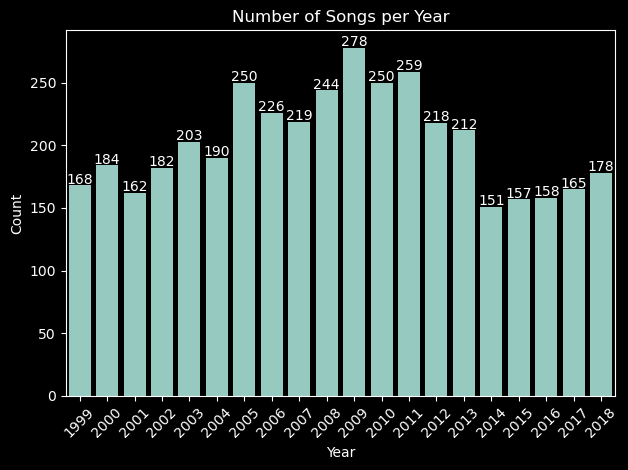

In [26]:
#song count graph
sns.barplot(data=song_count_df, x='year', y='count')
plt.title('Number of Songs per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for i, value in enumerate(song_count_df['count']):
    plt.text(i, value + 10, str(value), ha='center', va='top', fontsize=10);

plt.savefig('songs_per_year.png')

In [28]:
unique_artists = unique_songs.groupby('year')['main_artist'].nunique().reset_index(name='unique_artist')
unique_artists.sum()

year             40170
unique_artist     2465
dtype: int64

In [29]:
unique_songs[unique_songs['year'] == 2011].nlargest(5, 'Tempo')

,song_x,artist_x,peak-rank,weeks-on-board,year,featured_artist,main_artist,Acousticness,artist_y,Danceability,Duration,Energy,Explicit,Instrumentalness,Liveness,Loudness,Mode,song_y,Speechiness,Tempo,TimeSignature,Valence,song_cleaned,tempo_range,duration_min
16873,honey bee,blake shelton,13,20,2011,None,blake shelton,0.00167,blake shelton,0.481,210720,0.849,False,0.000001,0.1210,-5.131,1,honey bee,0.0385,205.570,4,0.723,honey bee,Fast,3:30
16198,skyscraper,demi lovato,10,15,2011,None,demi lovato,0.14400,demi lovato,0.300,221960,0.605,False,0.000000,0.1220,-3.339,1,skyscraper,0.0473,205.333,4,0.215,skyscraper,Fast,3:41
17850,jack sparrow,the lonely island featuring michael bolton,69,2,2011,michael bolton,the lonely island,0.02090,the lonely island,0.533,187747,0.759,False,0.000001,0.0464,-5.244,1,jack sparrow,0.3240,193.883,4,0.354,jack sparrow,Fast,3:07
15889,we'll be fine,drake featuring birdman,89,1,2011,birdman,drake,0.00171,drake,0.386,247947,0.488,True,0.000000,0.6400,-7.303,0,we'll be fine,0.4220,193.397,4,0.217,we'll be fine,Fast,4:07
19279,as she's walking away,zac brown band featuring alan jackson,32,20,2011,alan jackson,zac brown band,0.47400,zac brown band,0.553,223827,0.619,False,0.000000,0.1230,-7.101,1,as she's walking away (feat. alan jackson),0.0308,183.910,4,0.374,as she's walking away,Fast,3:43


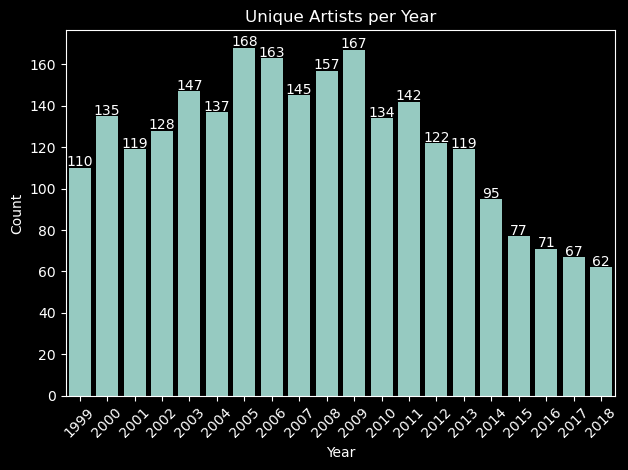

In [30]:
#unique artist count graph
sns.barplot(data=unique_artists, x='year', y='unique_artist')
plt.title('Unique Artists per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
for i, value in enumerate(unique_artists['unique_artist']):
    plt.text(i, value + 6, str(value), ha='center', va='top', fontsize=10);

In [31]:
mode_count = unique_songs.groupby('year')['Mode'].value_counts().reset_index(name='count')
mode_count['Mode'] = mode_count['Mode'].replace({1: 'Major', 0: 'Minor'})
mode_count

,year,Mode,count
0,1999,Major,122
1,1999,Minor,46
2,2000,Major,120
3,2000,Minor,64
4,2001,Major,108
5,2001,Minor,54
6,2002,Major,115
7,2002,Minor,67
8,2003,Major,131
9,2003,Minor,72


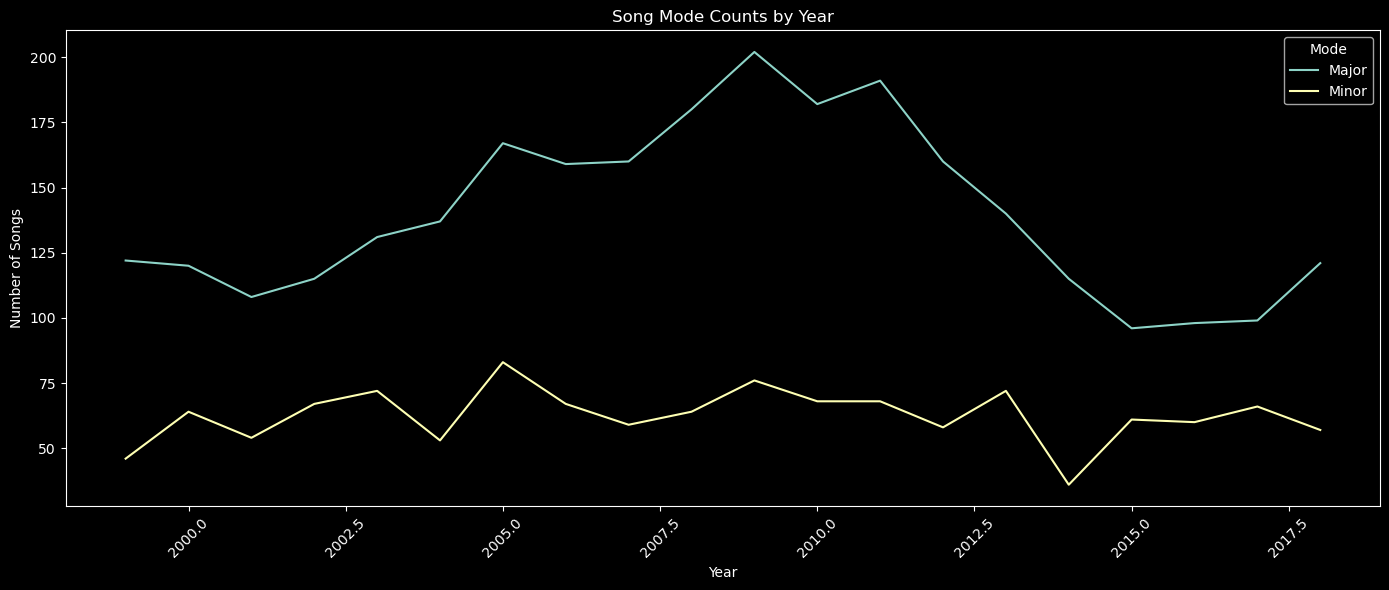

In [297]:

plt.figure(figsize=(14, 6))
sns.lineplot(data=mode_count, x='year', y='count', hue='Mode')

plt.title('Song Mode Counts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.legend(title='Mode')
plt.tight_layout()
plt.show()

In [253]:
speech_median = unique_songs.groupby('year')['Speechiness'].median().reset_index(name='Speechiness')
speech_median_2000s = speech_median[speech_median['year'] <= 2009]
speech_median_2010s = speech_median[speech_median['year'] >= 2010]
speech_median_2000s

,year,Speechiness
0,1999,0.03655
1,2000,0.03930
2,2001,0.04660
3,2002,0.04980
4,2003,0.05690
5,2004,0.04680
6,2005,0.05620
7,2006,0.04960
8,2007,0.04790
9,2008,0.05015


C:\Users\berge\AppData\Local\Temp\ipykernel_13232\22834671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_median_2000s['year'] = '2000–2009'
C:\Users\berge\AppData\Local\Temp\ipykernel_13232\22834671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_median_2010s['year'] = '2010–2018'


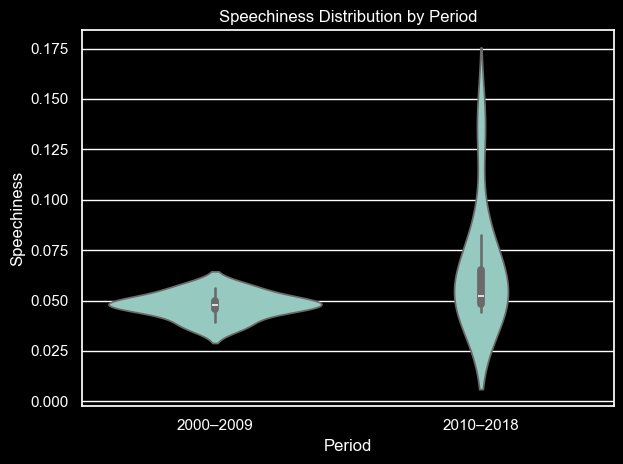

In [317]:
speech_median_2000s['year'] = '2000–2009'
speech_median_2010s['year'] = '2010–2018'
speech_combined = pd.concat([speech_median_2000s, speech_median_2010s])

sns.violinplot(data=speech_combined, x='year', y='Speechiness')
plt.title('Speechiness Distribution by Period')
plt.xlabel('Period')
plt.ylabel('Speechiness')
plt.tight_layout()
plt.savefig('speech_eras.png')
plt.show()

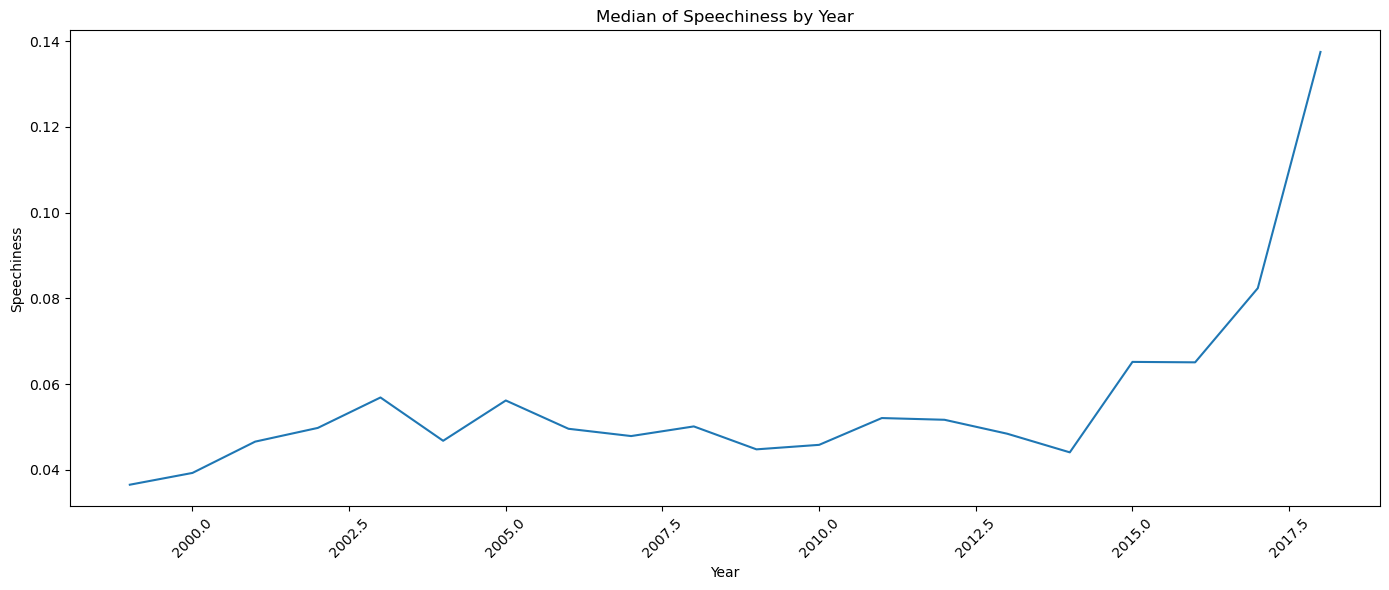

In [250]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=speech_median, x='year', y='Speechiness')

plt.title('Median of Speechiness by Year')
plt.xlabel('Year')
plt.ylabel('Speechiness')
plt.xticks(rotation=45)
#plt.legend(title='Speechiness')
plt.tight_layout()
plt.show()

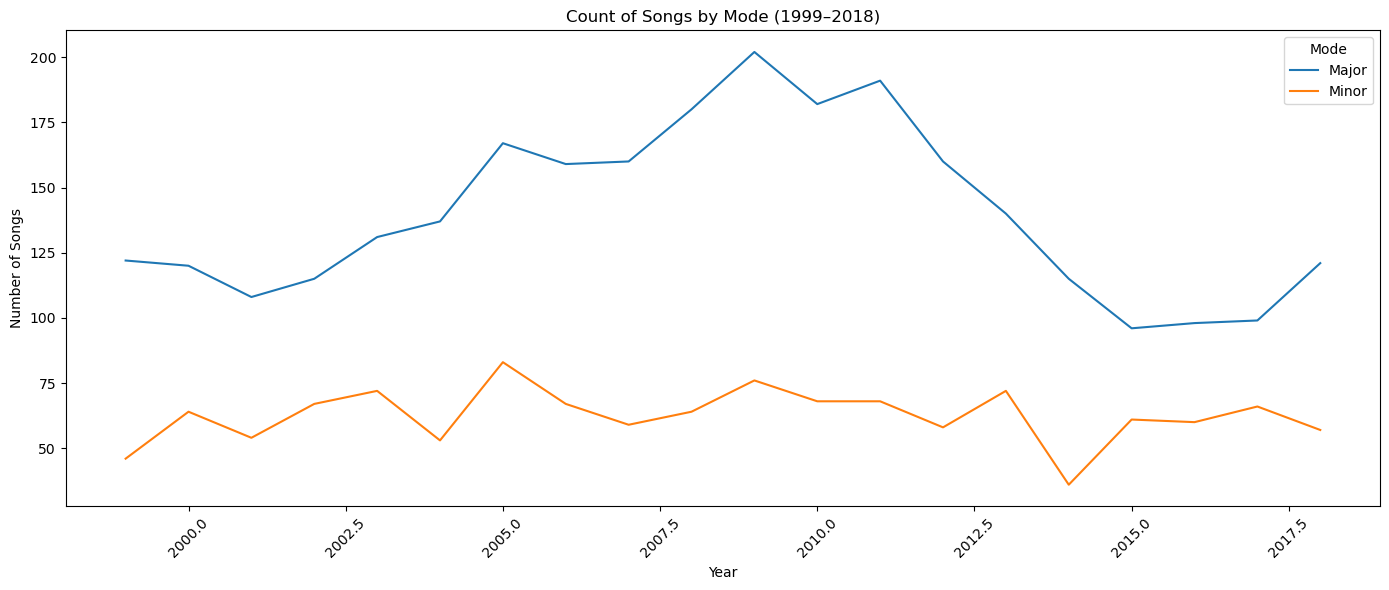

In [238]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=mode_count, x='year', y='count', hue='Mode', hue_order=['Major', 'Minor'])

plt.title('Count of Songs by Mode (1999–2018)')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.legend(title='Mode')
plt.tight_layout()
plt.show()

In [264]:
calc_features = unique_songs.groupby('year')[['Energy', 'Danceability', 'Valence', 'Acousticness', 'Tempo', 'Instrumentalness', 'Speechiness', 'Loudness']].mean().reset_index()
calc_features

,year,Energy,Danceability,Valence,Acousticness,Tempo,Instrumentalness,Speechiness,Loudness
0,1999,0.651333,0.626827,0.540001,0.185105,113.309946,0.015700,0.074095,-7.165429
1,2000,0.687293,0.651071,0.576313,0.150988,117.412228,0.009418,0.080128,-6.565402
2,2001,0.676907,0.637475,0.555531,0.170839,115.191716,0.004789,0.088567,-6.399519
3,2002,0.716187,0.636923,0.571320,0.151852,118.894577,0.012711,0.095746,-5.730907
4,2003,0.708059,0.628882,0.576234,0.164156,118.649892,0.009184,0.115090,-5.782374
5,2004,0.696364,0.612611,0.528487,0.186655,119.216863,0.013439,0.095806,-5.964505
6,2005,0.721168,0.616168,0.557428,0.160841,120.230848,0.012057,0.107949,-5.829064
7,2006,0.720120,0.611372,0.553106,0.157989,124.259832,0.003245,0.093637,-5.544659
8,2007,0.716831,0.605041,0.537658,0.154416,124.463352,0.006198,0.094716,-5.633279
9,2008,0.734221,0.605693,0.542798,0.131076,125.351287,0.010858,0.084714,-5.317697


In [270]:
unique_songs['duration_min'] = unique_songs['Duration'] / 60000
song_length = unique_songs.groupby('year')['duration_min'].median().reset_index()
song_length['duration_mmss'] = song_length['duration_min'].apply(
    lambda x: f"{int(x)}:{int((x % 1) * 60):02}"
)
song_length

C:\Users\berge\AppData\Local\Temp\ipykernel_13232\180389548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['duration_min'] = unique_songs['Duration'] / 60000


,year,duration_min,duration_mmss
0,1999,3.960333,3:57
1,2000,4.104225,4:06
2,2001,4.081667,4:04
3,2002,4.038783,4:02
4,2003,4.052667,4:03
5,2004,3.960558,3:57
6,2005,3.899892,3:53
7,2006,3.877108,3:52
8,2007,3.919550,3:55
9,2008,3.841225,3:50


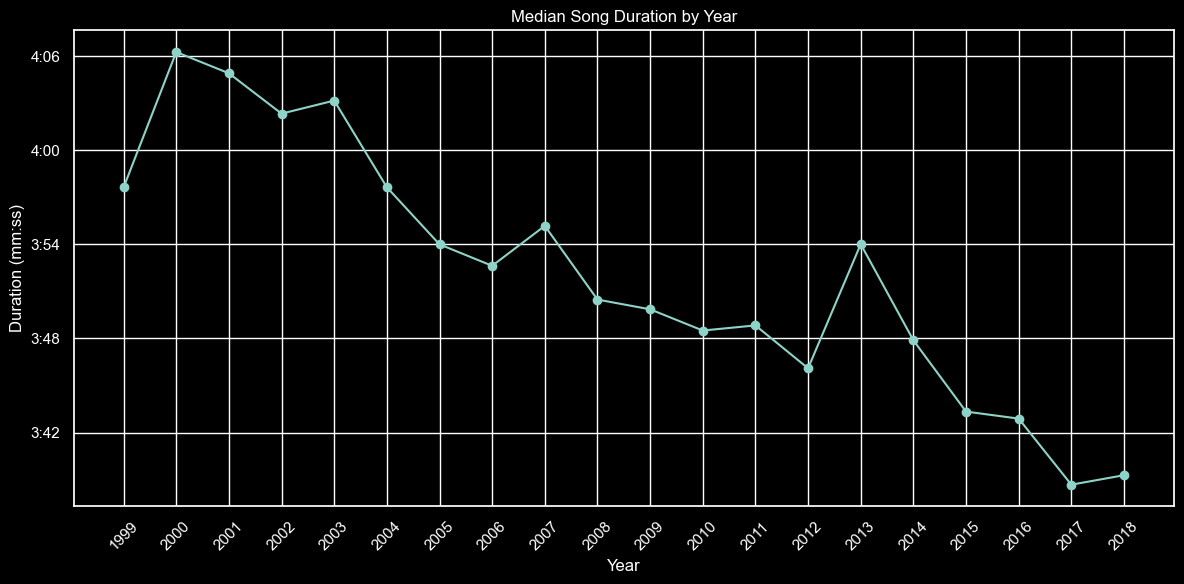

In [322]:
def minsec_formatter(x, pos=None):
    minutes = int(x)
    seconds = int(round((x - minutes) * 60))
    return f"{minutes}:{seconds:02}"

plt.figure(figsize=(12,6))
plt.plot(song_length['year'], song_length['duration_min'], marker='o')
plt.title('Median Song Duration by Year')
plt.xlabel('Year')
plt.ylabel('Duration (mm:ss)')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(minsec_formatter))

plt.xticks(rotation=45)
plt.xticks(ticks=song_length['year'], rotation=45)
plt.tight_layout()
plt.savefig('song_duration.png')
plt.show()

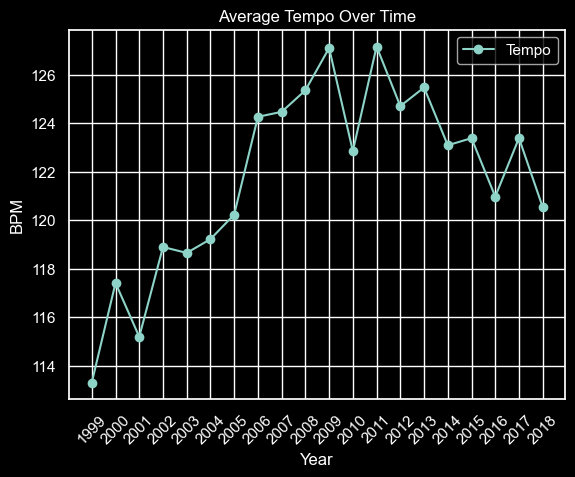

In [315]:
plt.plot(calc_features['year'], calc_features['Tempo'], label='Tempo', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Tempo Over Time')
plt.legend()
plt.xticks(calc_features['year'], rotation=45)
plt.savefig('average_tempo_over_time.png')
plt.show()

C:\Users\berge\AppData\Local\Temp\ipykernel_13232\3167657757.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


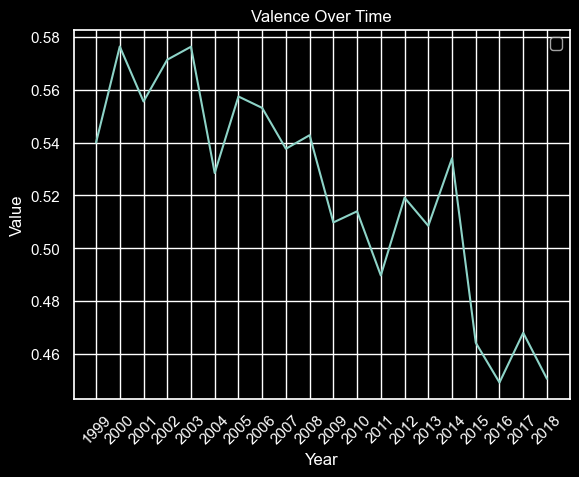

In [316]:
plt.plot(calc_features['year'], calc_features['Valence'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Valence Over Time')
plt.legend()
plt.xticks(calc_features['year'], rotation=45)
plt.savefig('valence_over_time.png')
plt.show()

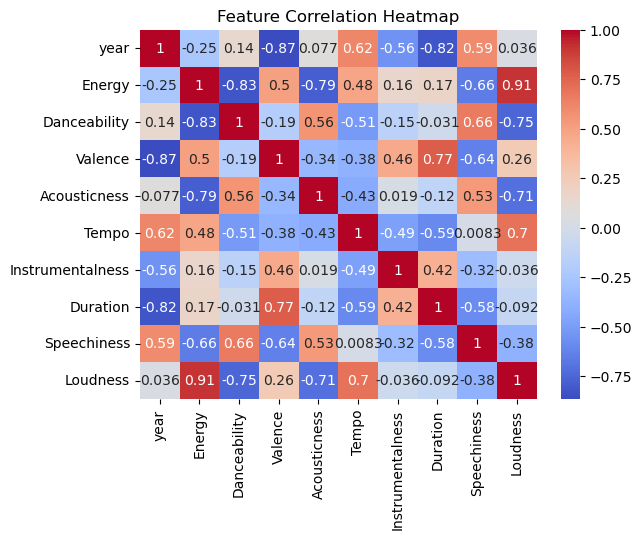

In [121]:
corr = calc_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

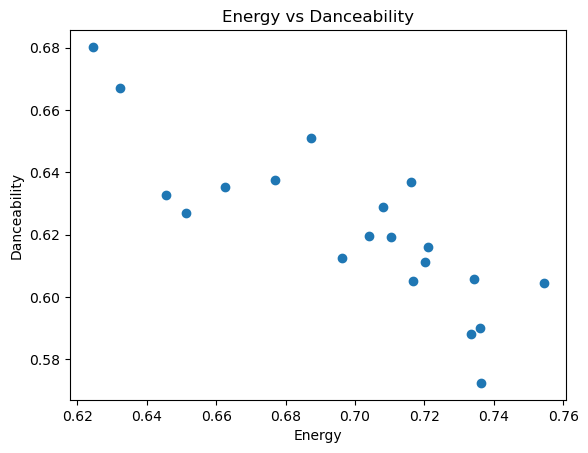

In [119]:
plt.scatter(calc_features['Energy'], calc_features['Danceability'])
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.title('Energy vs Danceability')
plt.show()

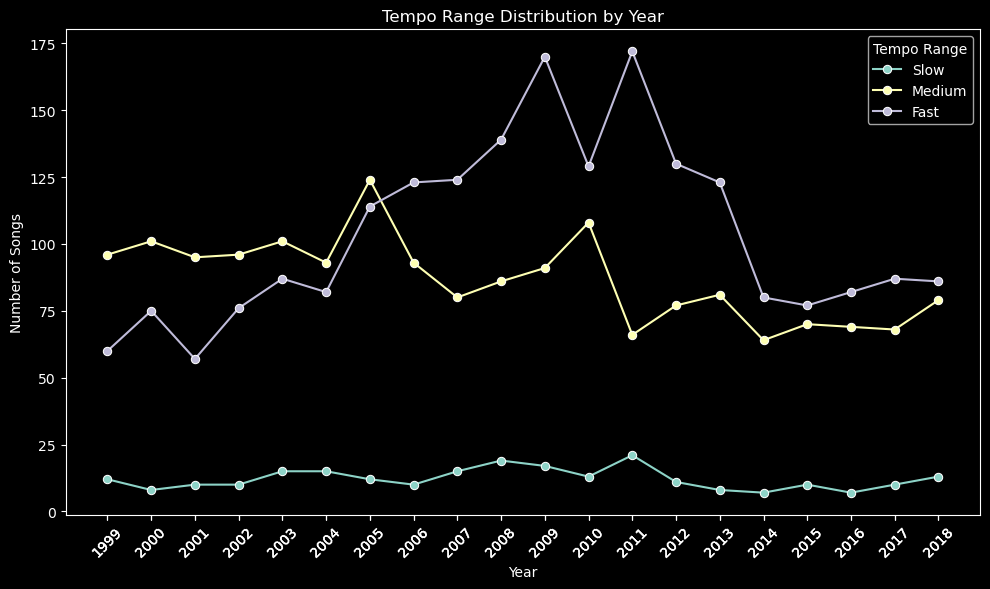

In [301]:
order = ['Slow', 'Medium', 'Fast']

plt.figure(figsize=(10, 6))
sns.lineplot(data=tempo_range, x='year', y='count', hue='tempo_range', hue_order=order, marker='o')

plt.title('Tempo Range Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(tempo_range['year'], rotation=45)
plt.legend(title='Tempo Range')
plt.tight_layout()
plt.savefig('tempo_range_distribution.png')


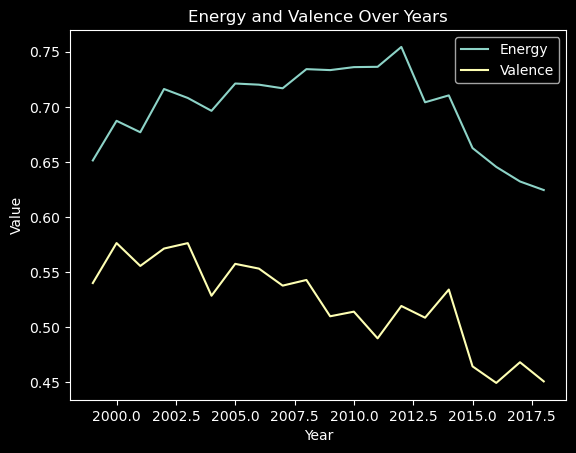

In [302]:
plt.plot(calc_features['year'], calc_features['Energy'], label='Energy')
plt.plot(calc_features['year'], calc_features['Valence'], label='Valence')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Energy and Valence Over Years')
plt.legend()
plt.show()

In [303]:
name_corrections = {
    'Lil Wayne': "Lil' Wayne",	
    'Tim Mcgraw': 'Tim McGraw'}
top_artists = unique_songs['main_artist'].value_counts().reset_index(name='count').head(5)
top_artists['main_artist'] = top_artists['main_artist'].str.title()
top_artists['main_artist'] = top_artists['main_artist'].replace(name_corrections)
top_artists

,main_artist,count
0,Drake,111
1,Taylor Swift,61
2,Lil' Wayne,57
3,Justin Bieber,47
4,Tim McGraw,43


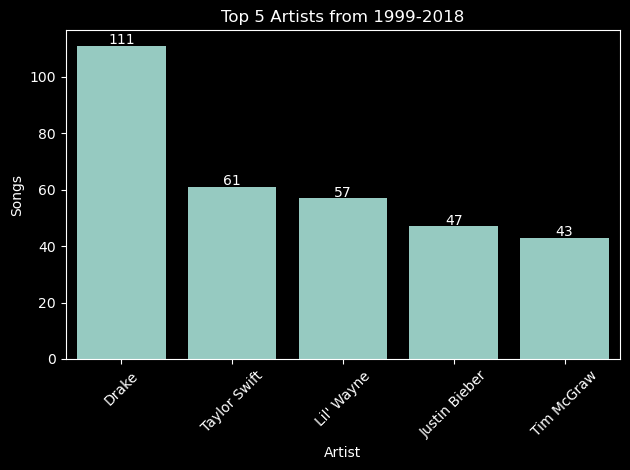

In [304]:
sns.barplot(x='main_artist', y='count', data=top_artists)
plt.title('Top 5 Artists from 1999-2018')
plt.ylabel('Songs')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.tight_layout()

for i, value in enumerate(top_artists['count']):
    plt.text(i, value + 4.5, str(value), ha='center', va='top', fontsize=10);

plt.savefig('top_5_artists.png')

In [220]:
idx = unique_songs.groupby('year')['Valence'].idxmax()
song_titles_happy = unique_songs.loc[idx, ['year', 'song_cleaned', 'main_artist', 'Valence', 'peak-rank', 'Energy', 'Tempo', 'Danceability']]
song_titles_happy

,year,song_cleaned,main_artist,Valence,peak-rank,Energy,Tempo,Danceability
59749,1999,every morning,sugar ray,0.975,3,0.679,109.916,0.833
57283,2000,the bad touch,bloodhound gang,0.970,52,0.741,122.984,0.841
55045,2001,what's your fantasy,ludacris,0.962,21,0.813,140.089,0.914
51912,2002,goodbye,jagged edge,0.971,58,0.728,129.998,0.821
47140,2003,beautiful,snoop dogg,0.961,6,0.695,101.007,0.907
44417,2004,just a little while,janet jackson,0.972,45,0.779,135.100,0.771
39599,2005,la camisa negra,juanes,0.969,89,0.719,97.005,0.747
36862,2006,lo que me gusta a mi,juanes,0.968,94,0.890,94.997,0.677
33402,2007,sexyback,justin timberlake,0.964,1,0.599,117.001,0.967
29183,2008,give it 2 me,madonna,0.972,57,0.954,127.019,0.837


In [221]:
idx = unique_songs.groupby('year')['Valence'].idxmin()
song_titles_sad = unique_songs.loc[idx, ['year', 'song_cleaned', 'main_artist', 'Valence', 'peak-rank', 'Energy', 'Tempo', 'Danceability']]
song_titles_sad

,year,song_cleaned,main_artist,Valence,peak-rank,Energy,Tempo,Danceability
59542,1999,the day the world went away,nine inch nails,0.0518,17,0.537,118.973,0.304
58318,2000,auld lang syne,kenny g,0.0390,7,0.276,130.259,0.363
54592,2001,thank you for loving me,bon jovi,0.1270,57,0.390,132.978,0.396
50596,2002,a new day has come,celine dion,0.0609,22,0.333,119.483,0.436
48105,2003,i wish you'd stay,brad paisley,0.0906,57,0.290,93.694,0.472
43027,2004,my immortal,evanescence,0.0776,7,0.290,68.992,0.186
40737,2005,the widow,the mars volta,0.1050,95,0.695,101.068,0.225
37691,2006,the ghost of you,my chemical romance,0.0372,84,0.752,144.766,0.181
32796,2007,you raise me up,josh groban,0.0981,76,0.136,118.086,0.250
27579,2008,the shock of the lightning,oasis,0.0375,93,0.956,136.909,0.336


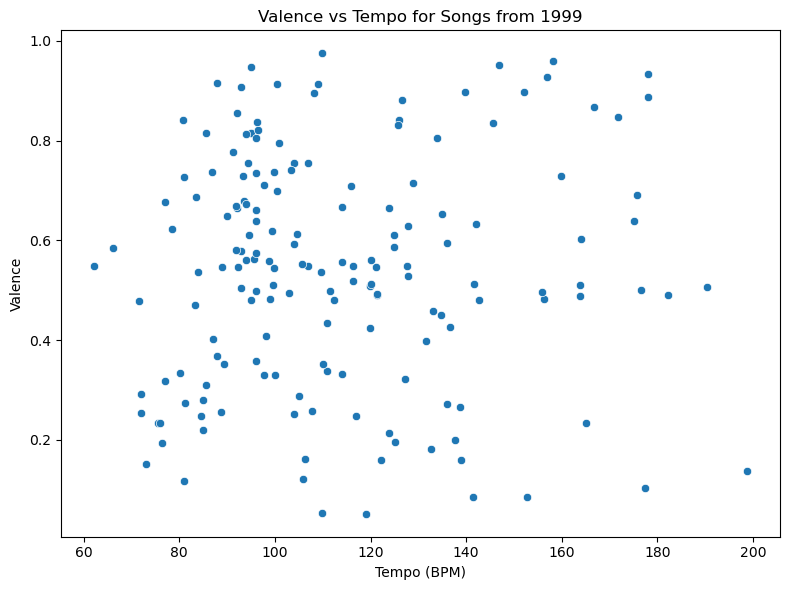

In [110]:
songs_1999 = unique_songs[unique_songs['year'] == 1999]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=songs_1999, x='Tempo', y='Valence')

plt.title('Valence vs Tempo for Songs from 1999')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Valence')
plt.tight_layout()


In [149]:
#songs_1999['Tempo'].corr(songs_1999['Valence'])

unique_songs['Tempo'].corr(unique_songs['Danceability'])

-0.25097665152257853

In [36]:
unique_songs['Danceability_level'] = ['More Danceable' if x > 0.45 else 'Less Danceable' for x in unique_songs['Danceability']]
dance_counts = unique_songs['Danceability_level'].value_counts()
dance_pct = (dance_counts / dance_counts.sum()) * 100
dance_pct

C:\Users\berge\AppData\Local\Temp\ipykernel_11596\1991449563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['Danceability_level'] = ['More Danceable' if x > 0.45 else 'Less Danceable' for x in unique_songs['Danceability']]


Danceability_level
More Danceable    87.937839
Less Danceable    12.062161
Name: count, dtype: float64

In [37]:
unique_songs['Energy_level'] = ['Higher Energy' if x > 0.45 else 'Lower Energy' for x in unique_songs['Energy']]
energy_counts = unique_songs['Energy_level'].value_counts()
energy_pct = (energy_counts / energy_counts.sum()) * 100
energy_pct

C:\Users\berge\AppData\Local\Temp\ipykernel_11596\4148307314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['Energy_level'] = ['Higher Energy' if x > 0.45 else 'Lower Energy' for x in unique_songs['Energy']]


Energy_level
Higher Energy    91.267884
Lower Energy      8.732116
Name: count, dtype: float64

In [38]:
unique_songs['Valence_level'] = ['Happy' if x > 0.48 else 'Sad' for x in unique_songs['Valence']]
valence_counts = unique_songs['Valence_level'].value_counts()
valence_pct = (valence_counts / valence_counts.sum()) * 100
valence_pct

C:\Users\berge\AppData\Local\Temp\ipykernel_11596\3361972146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_songs['Valence_level'] = ['Happy' if x > 0.48 else 'Sad' for x in unique_songs['Valence']]


Valence_level
Happy    56.906759
Sad      43.093241
Name: count, dtype: float64

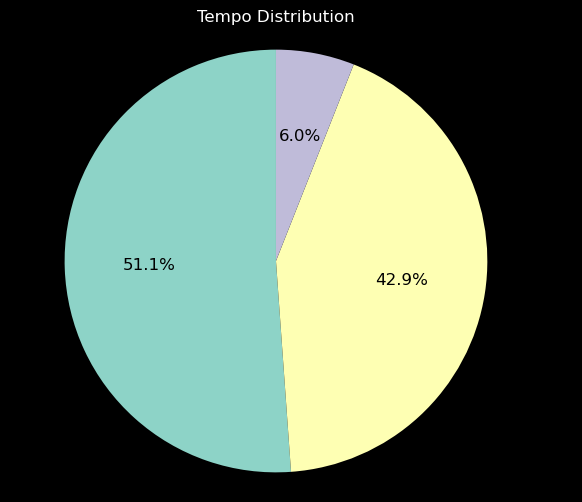

In [34]:
#tempo pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    tempo_pct,
    labels=tempo_pct.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color': 'black', 'fontsize': 12})
plt.title('Tempo Distribution')
plt.axis('equal')
plt.savefig('tempo_pie_chart.png')
plt.show()

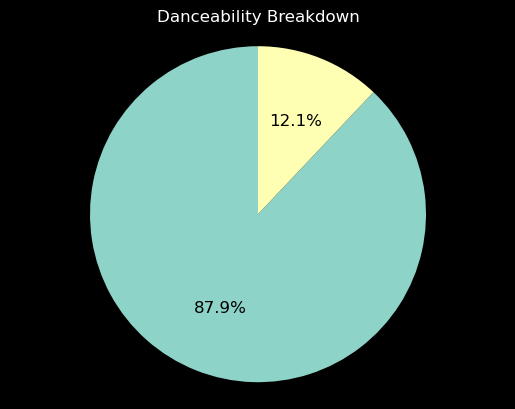

In [39]:
plt.pie(dance_pct, labels=dance_pct.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'fontsize': 12})
plt.title('Danceability Breakdown')
plt.axis('equal')
plt.savefig('danceable_pie_chart.png')
plt.show()

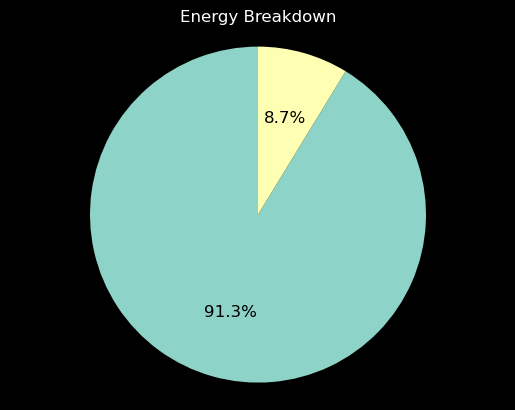

In [41]:
plt.pie(energy_pct, labels=energy_pct.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'fontsize': 12})
plt.title('Energy Breakdown')
plt.axis('equal')
plt.savefig('energy_pie_chart.png')
plt.show()

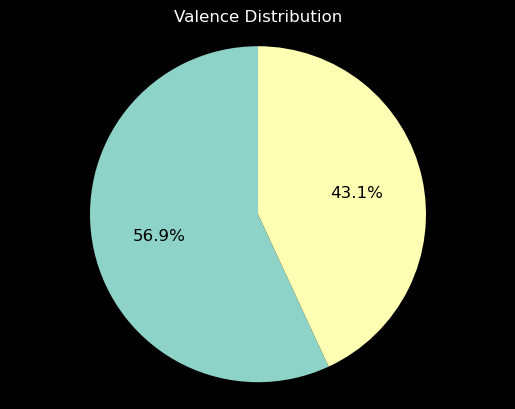

In [42]:
plt.pie(valence_pct, labels=valence_pct.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black', 'fontsize': 12})
plt.title('Valence Distribution')
plt.axis('equal')
plt.savefig('valence_pie_chart.png')
plt.show()